### El más Nobel de los premios
El Premio Nobel es quizás el premio científico más conocido del mundo. Además del honor, el prestigio y una considerable suma de dinero como premio, el destinatario recibe también una medalla de oro con la imagen de [Alfred Nobel](https://es.wikipedia.org/wiki/Alfred_Nobel) (1833-1896), quien instituyó el premio en 1895. Cada año se entrega a científicos y académicos en las categorías química, literatura, física, fisiología o medicina, economía y paz. El primer Premio Nobel se entregó en 1901, y en ese momento el Premio era muy Eurocéntrico y centrado en los hombres, aunque hoy en día ya no está sesgado de ninguna manera. Seguro... ¿No? 🤔

Bueno ok, vamos a averiguarlo! La Fundación Nobel ha puesto a disposición un [dataset](https://www.kaggle.com/nobelfoundation/nobel-laureates) con todos los ganadores del premio desde el comienzo del mismo, en 1901, hasta 2016. Vamos a cargarlo y echar un vistazo.

In [69]:
# Cargamos las librerías necesarias
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Establecemos el theme para Seaborn
sns.set()
# y el tamaño para todos los gráficos
plt.rcParams['figure.figsize'] = [18, 7]

# Cargamos el dataset
nobel = pd.read_csv("datasets/nobel.csv")

# Veamos que contiene
nobel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
year                    911 non-null int64
category                911 non-null object
prize                   911 non-null object
motivation              823 non-null object
prize_share             911 non-null object
laureate_id             911 non-null int64
laureate_type           911 non-null object
full_name               911 non-null object
birth_date              883 non-null object
birth_city              883 non-null object
birth_country           885 non-null object
sex                     885 non-null object
organization_name       665 non-null object
organization_city       667 non-null object
organization_country    667 non-null object
death_date              593 non-null object
death_city              576 non-null object
death_country           582 non-null object
dtypes: int64(2), object(16)
memory usage: 128.2+ KB


In [70]:
# Y un vistazo a la información
nobel.head(10)

year    category                                           prize  \
0  1901   Chemistry               The Nobel Prize in Chemistry 1901   
1  1901  Literature              The Nobel Prize in Literature 1901   
2  1901    Medicine  The Nobel Prize in Physiology or Medicine 1901   
3  1901       Peace                      The Nobel Peace Prize 1901   
4  1901       Peace                      The Nobel Peace Prize 1901   
5  1901     Physics                 The Nobel Prize in Physics 1901   
6  1902   Chemistry               The Nobel Prize in Chemistry 1902   
7  1902  Literature              The Nobel Prize in Literature 1902   
8  1902    Medicine  The Nobel Prize in Physiology or Medicine 1902   
9  1902       Peace                      The Nobel Peace Prize 1902   

                                          motivation prize_share  laureate_id  \
0  "in recognition of the extraordinary services ...         1/1          160   
1  "in special recognition of his poetic composit...         1/1          569   
2  "for his work on serum therapy, especially its...         1/1          293   
3                                                NaN         1/2          462   
4                                                NaN         1/2          463   
5  "in recognition of the extraordinary services ...         1/1            1   
6  "in recognition of the extraordinary services ...         1/1          161   
7  "the greatest living master of the art of hist...         1/1          571   
8  "for his work on malaria, by which he has show...         1/1          294   
9                                                NaN         1/2          464   

  laureate_type                           full_name  birth_date  \
0    Individual        Jacobus Henricus van 't Hoff  1852-08-30   
1    Individual                     Sully Prudhomme  1839-03-16   
2    Individual              Emil Adolf von Behring  1854-03-15   
3    Individual                   Jean Henry Dunant  1828-05-08   
4    Individual                      Frédéric Passy  1822-05-20   
5    Individual              Wilhelm Conrad Röntgen  1845-03-27   
6    Individual                Hermann Emil Fischer  1852-10-09   
7    Individual  Christian Matthias Theodor Mommsen  1817-11-30   
8    Individual                         Ronald Ross  1857-05-13   
9    Individual                       Élie Ducommun  1833-02-19   

           birth_city        birth_country   sex   organization_name  \
0           Rotterdam          Netherlands  Male   Berlin University   
1               Paris               France  Male                 NaN   
2   Hansdorf (Lawice)     Prussia (Poland)  Male  Marburg University   
3              Geneva          Switzerland  Male                 NaN   
4               Paris               France  Male                 NaN   
5  Lennep (Remscheid)    Prussia (Germany)  Male   Munich University   
6          Euskirchen    Prussia (Germany)  Male   Berlin University   
7             Garding  Schleswig (Germany)  Male                 NaN   
8              Almora                India  Male  University College   
9              Geneva          Switzerland  Male                 NaN   

  organization_city organization_country  death_date      death_city  \
0            Berlin              Germany  1911-03-01          Berlin   
1               NaN                  NaN  1907-09-07        Châtenay   
2           Marburg              Germany  1917-03-31         Marburg   
3               NaN                  NaN  1910-10-30          Heiden   
4               NaN                  NaN  1912-06-12           Paris   
5            Munich              Germany  1923-02-10          Munich   
6            Berlin              Germany  1919-07-15          Berlin   
7               NaN                  NaN  1903-11-01  Charlottenburg   
8         Liverpool       United Kingdom  1932-09-16    Putney Heath   
9               NaN                  NaN  1906-12-07            Bern   

    d

### Asi que... quienes obtienen el Premio Nobel?
Tan solo mirando a los primeros ganadores del premio, ya vemos a una celebridad: [Wilhelm Conrad Röntgen](https://es.wikipedia.org/wiki/Wilhelm_R%C3%B6ntgen), el físico e ingeniero alemán que descubrió los rayos X. Y, de hecho, vemos que todos los ganadores en 1901 fueron hombres provenientes de Europa. Pero eso fue en 1901, mirando a todos los ganadores en el conjunto de datos, de 1901 a 2016, ¿qué sexo y de qué país son los más comúnmente representados?

(Para el país, utilizaremos el país de nacimiento "`birth_date`" del ganador, ya que el país de organización "`organization_country`" es `NaN` para todos los Premios Nobel compartidos).

In [71]:
# Premios Nobel entregados entre 1901 y 2016
print("Cantidad de premios Nobel entregados hasta 2016: " + str(len(nobel)))

Cantidad de premios Nobel entregados hasta 2016: 911


In [72]:
# Número de premios entregados según sexo del ganador
nobel["sex"].value_counts()

Male      836
Female     49
Name: sex, dtype: int64

In [73]:
# Top 10 de nacionalidades con mayor cantidad de premios entregados
nobel["birth_country"].value_counts().head(10)

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Russia                       17
Italy                        17
Name: birth_country, dtype: int64

### Dominación de EE.UU.
Quizás no sea tan sorprendente: el premio Nobel más típico entre 1901 y 2016 fue para hombres nacidos en los Estados Unidos de América. Pero en 1901 todos los ganadores eran europeos. ¿Cuándo comenzó Estados Unidos a dominar las listas del Premio Nobel?

In [74]:
# Creamos una columna para ganadores estadounidense
nobel["usa_born_winner"] = nobel["birth_country"].apply(lambda x: True if x == "United States of America" else False)

# Creamos una columna con la década en que fue otorgado el premio
nobel["decade"] = nobel["year"].apply(lambda x: x - (x % 10))

# Calculamos la proporción de ganadores estadounidenses por década
prop_usa_winners = nobel.groupby("decade", as_index=False)["usa_born_winner"].mean()

# Proporción de ganadores estadounidenses por década
print(prop_usa_winners)

    decade  usa_born_winner
0     1900         0.017544
1     1910         0.075000
2     1920         0.074074
3     1930         0.250000
4     1940         0.302326
5     1950         0.291667
6     1960         0.265823
7     1970         0.317308
8     1980         0.319588
9     1990         0.403846
10    2000         0.422764
11    2010         0.292683


Conviene mejor visualizarlo con un gráfico

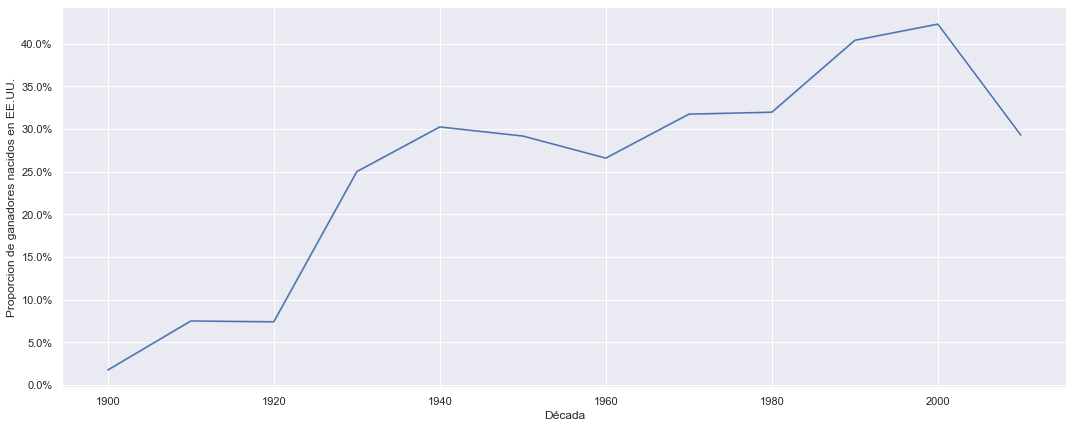

In [75]:
# Creamos gráfico de línea para la proporción de ganadores estadounidenses 
ax = sns.lineplot(x="decade", y="usa_born_winner", data=nobel, ci=False)

# Agregamos formato porcentual para el eje y
from matplotlib.ticker import PercentFormatter
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Establecemos el nombre de los ejes
ax.set_ylabel("Proporcion de ganadores nacidos en EE.UU.")
ax.set_xlabel("Década")

plt.show()

### Cuál es el género de un típico ganador del Premio Nobel?
Como podemos observar, Estados Unidos se convirtió en el ganador dominante del Premio Nobel por primera vez en la década de 1930 y mantiene la posición de liderazgo desde entonces. Pero un grupo que estuvo a la cabeza desde el principio, y que nunca parece ceder terreno, son los hombres. Tal vez no debería sorprender que haya algún desequilibrio entre ganadores de premios masculinos y femeninos, pero ¿qué tan significativo es este desequilibrio? ¿Y es mejor o peor dentro de cada una de las categorías específicas como física, medicina, literatura, etc.?

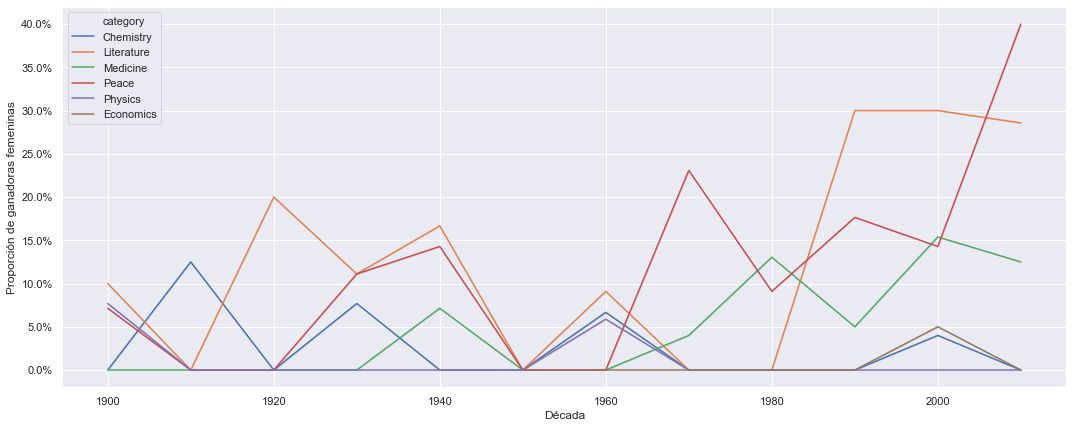

In [76]:
# Creamos una columna para las ganadoras femeninas
nobel["female_winner"] = nobel["sex"].apply(lambda x: True if x == "Female" else False)

# Calculamos la proporción de ganadoras femeninas a lo largo de las décadas y para cada categoría
prop_female_winners = nobel.groupby(["decade","category"], as_index=False)["female_winner"].mean()

# Creamos gráfico de líneas
ax = sns.lineplot(x="decade", y="female_winner", data=nobel, ci=False, hue="category")

# Agregamos formato porcentual para el eje y
ax.yaxis.set_major_formatter(PercentFormatter(1.0))

# Establecemos el nombre de los ejes
ax.set_ylabel("Proporción de ganadoras femeninas")
ax.set_xlabel("Década")

plt.show()

### Primera mujer en ganar el Premio Nobel
El gráfico anterior quedó bastante confuso ya que las líneas se superponen, pero muestra algunas tendencias y patrones interesantes. En general, el desequilibrio es bastante grande, sobre todo en física, economía y química que tienen las menores proporciones. Medicina tiene una tendencia algo positiva, y desde la década de 1990 el premio de literatura está más equilibrado. El gran valor atípico es el premio de la paz durante la década de 2010, pero tengamos en cuenta que esto solo cubre los años 2010 a 2016.

Dado este desequilibrio, ¿quién fue la primera mujer en recibir un Premio Nobel? ¿Y en qué categoría?

In [77]:
# Filtramos las mujeres y nos quedamos con la ganadora más antigua
nobel[nobel["sex"] == "Female"].nsmallest(1, "year")[["year","full_name","category"]]

year                    full_name category
19  1903  Marie Curie, née Sklodowska  Physics

### Ganadores repetidos
Para la mayoría de los científicos / escritores / activistas, un Premio Nobel sería el mayor logro de una larga carrera. Pero para algunas personas, uno simplemente no es suficiente, y pocos lo han conseguido más de una vez. ¿Quiénes son estos pocos afortunados? (Al no haber ganado el Premio Nobel yo mismo, asumiré que se trata solo de suerte 😋).


In [78]:
# Seleccionamos los ganadores con 2 o más premios
nobel.groupby("full_name").filter(lambda x: x["full_name"].count() > 1)[["year","full_name","category"]]

year                                          full_name   category
19   1903                        Marie Curie, née Sklodowska    Physics
62   1911                        Marie Curie, née Sklodowska  Chemistry
89   1917  Comité international de la Croix Rouge (Intern...      Peace
215  1944  Comité international de la Croix Rouge (Intern...      Peace
278  1954                                 Linus Carl Pauling  Chemistry
283  1954  Office of the United Nations High Commissioner...      Peace
298  1956                                       John Bardeen    Physics
306  1958                                   Frederick Sanger  Chemistry
340  1962                                 Linus Carl Pauling      Peace
348  1963  Comité international de la Croix Rouge (Intern...      Peace
424  1972                                       John Bardeen    Physics
505  1980                                   Frederick Sanger  Chemistry
523  1981  Office of the United Nations High Commissioner...      Peace

### ¿A qué edad obtienen el premio?
¡La lista de ganadores repetidos contiene algunos nombres ilustres! Nuevamente nos encontramos con [Marie Curie](https://es.wikipedia.org/wiki/Marie_Curie), que obtuvo el premio en física por descubrir la radiación y en química por aislar el radio y el polonio. [John Bardeen](https://es.wikipedia.org/wiki/John_Bardeen) lo obtuvo dos veces en física por sus trabajos sobre transistores y superconductividad, [Frederick Sanger](https://es.wikipedia.org/wiki/Frederick_Sanger) lo obtuvo dos veces en química, y [Linus Carl Pauling](https://es.wikipedia.org/wiki/Linus_Pauling) lo obtuvo primero en química y luego en paz por su trabajo en la promoción del desarme nuclear. También vemos que las organizaciones pueden obtener el premio, ya que tanto la [Cruz Roja](https://es.wikipedia.org/wiki/Cruz_Roja) como el [ACNUR](https://es.wikipedia.org/wiki/Alto_Comisionado_de_las_Naciones_Unidas_para_los_Refugiados) lo han recibido más de una vez.

Pero, ¿cuántos años tienes generalmente cuando obtienes el premio?

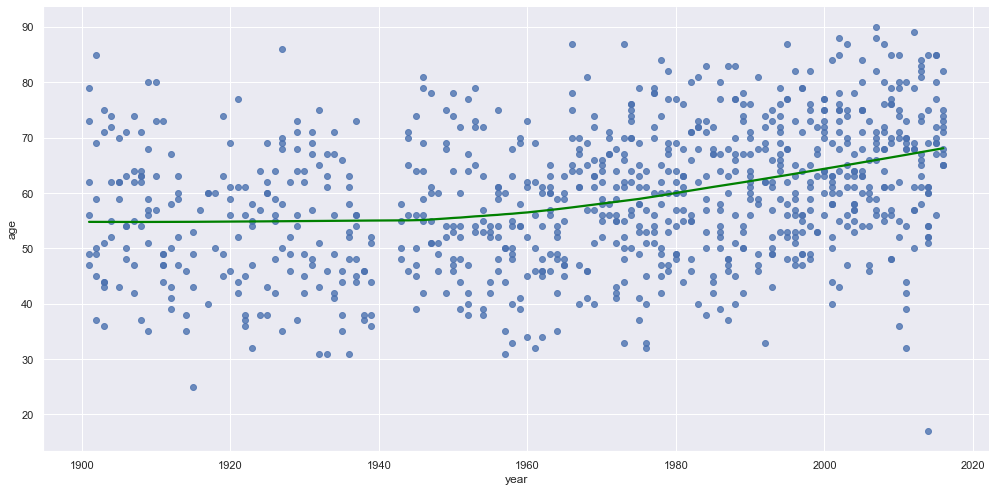

In [90]:
# Convertimos birth_date de string a datetime
nobel["birth_date"] = pd.to_datetime(nobel["birth_date"])

# Calculamos la edad de los ganadores de Premio Nobel
nobel["age"] = nobel["year"] - nobel["birth_date"].dt.year

# Creamos gráfico con una regresión de tipo Lowess
sns.lmplot(x="year", y="age", data=nobel, lowess=True, aspect=2, line_kws={'color': 'green'}, height=7)

plt.show()

### Diferencias de edad entre categorías
¡El gráfico de arriba nos muestra mucho! Vemos que al principio las personas solían tener alrededor de 55 años cuando recibían el premio, pero hoy en día el promedio está más cerca de los 65. Pero hay una gran dispersión en las edades de los galardonados, y aunque la mayoría tienen más de 50 años, algunos son muy jóvenes.

También vemos que la densidad de puntos es mucho más alta hoy en día que a principios del siglo XX: hoy en día se comparten muchos más premios, por lo que hay muchos más ganadores. También vemos que hubo una interrupción en los premios otorgados en torno a la Segunda Guerra Mundial (1939 - 1945).

Veamos las tendencias de edad dentro de las diferentes categorías de premios.

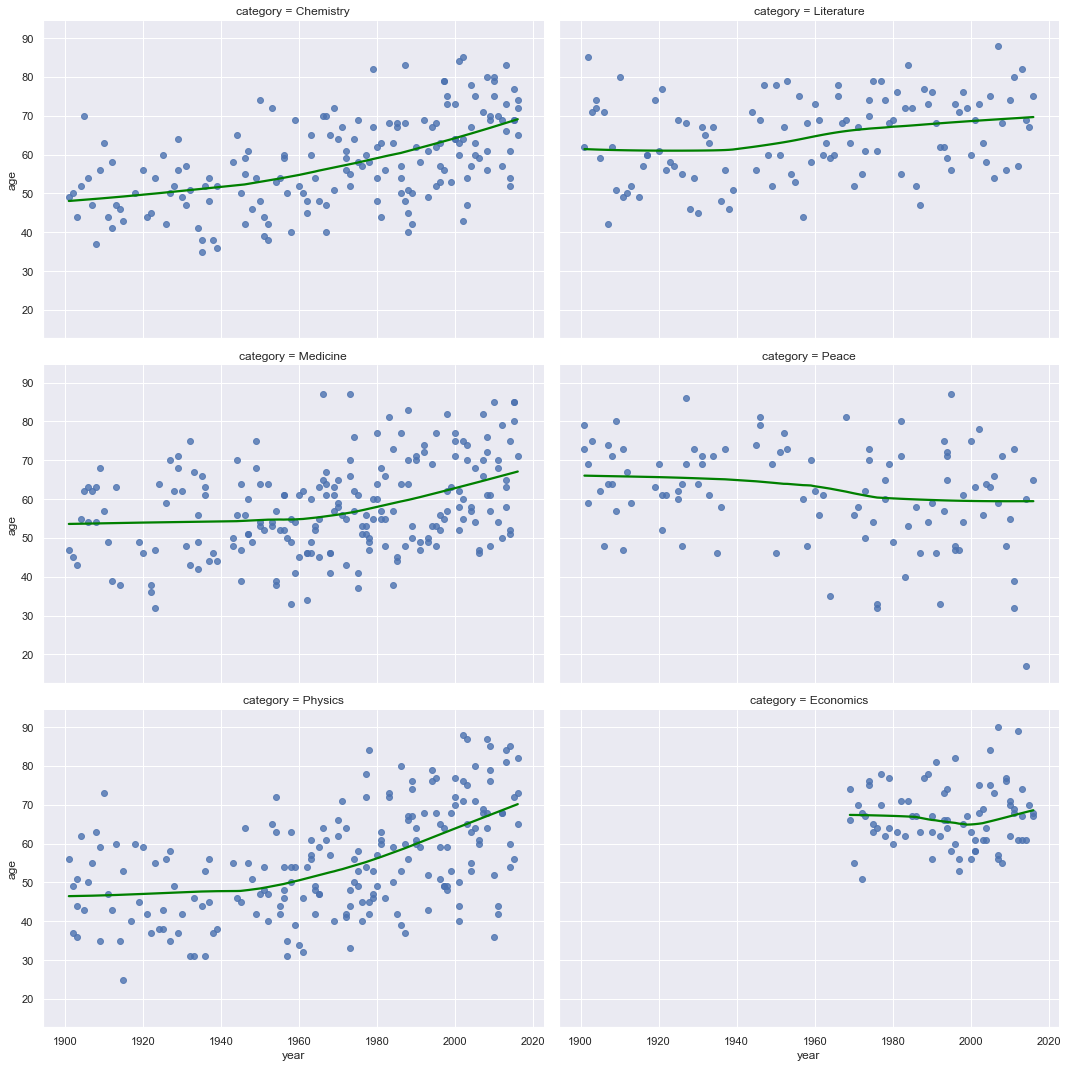

In [88]:
# Misma visualización que arriba, pero con gráficos separados para cada categoría
sns.lmplot(x="year", y="age", data=nobel, col="category", col_wrap=2, lowess=True, aspect=1.5, line_kws={'color': 'green'})

plt.show()

### Los más jóvenes y más viejos
Vemos que los ganadores del premio de química, medicina y física han envejecido con el tiempo. La tendencia es más fuerte para física: la edad promedio solía ser inferior a 50 años, y ahora es de casi 70. Literatura y la economía son más estables. También vemos que economía es una categoría relativamente nueva. ¡Pero la categoría paz muestra una tendencia opuesta donde los ganadores son cada vez más jóvenes!

En la categoría de paz también tenemos a un ganador que parece excepcionalmente joven alrededor de 2010. Esto plantea las preguntas, ¿quiénes son las personas más viejas y más jóvenes que hayan ganado un Premio Nobel?

In [91]:
# El ganador más viejo del Premio Nobel (hasta 2016)
nobel.nlargest(1, "age")[["year","category","full_name", "age"]]

year   category       full_name   age
793  2007  Economics  Leonid Hurwicz  90.0

In [92]:
# El ganador más joven del Premio Nobel (hasta 2016)
nobel.nsmallest(1, "age")[["year","category","full_name", "age"]]

year category         full_name   age
885  2014    Peace  Malala Yousafzai  17.0

### ¡Orgullo nacional!
Argentina también cuenta con ganadores del Premio Nobel. Repasemos sus logros. 

In [95]:
nobel[nobel["birth_country"] == "Argentina"][["year","category","full_name","birth_city","age"]]

year  category                 full_name    birth_city   age
187  1936     Peace     Carlos Saavedra Lamas  Buenos Aires  58.0
236  1947  Medicine  Bernardo Alberto Houssay  Buenos Aires  60.0
513  1980     Peace     Adolfo Pérez Esquivel  Buenos Aires  49.0
548  1984  Medicine            César Milstein  Bahia Blanca  57.0